In [ ]:
!pip install efficient-apriori
!pip install joblib

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
from efficient_apriori import apriori
from joblib import Parallel, delayed


In [ ]:
# Loading and exploring the data
df = pd.read_csv('/content/drive/MyDrive/output_svenska.csv')


In [ ]:
df.head()

,Substantiv,Singular obestämd,Singular obestämd genitiv,Singular bestämd,Singular bestämd genitiv,Plural obestämd,Plural obestämd genitiv,Plural bestämd,Plural bestämd genitiv,Article,Obestämd Första Bokstav,Obestämd Initial Två Bokstäver,Obestämd Initial Tre Bokstäver,Obestämd Sista Bokstäver,Obestämd Slutlig Två Bokstäver,Obestämd Slutlig Tre Bokstäver,Obestämd Vokalratio,Bestämd Vokalratio,Obestämd Ord Längd,Bestämd Ord Längd
0,trans·plant·er·ing,transplantering,transplanterings,transplanteringen,transplanteringens,transplanteringar,transplanteringars,transplanteringarna,transplanteringarnas,en,t,tr,tra,g,ng,ing,0.266667,0.294118,15,17
1,streck·are,streckare,streckares,streckaren,streckarens,streckare,streckares,streckarna,streckarnas,en,s,st,str,e,re,are,0.333333,0.300000,9,10
2,eiss,eiss,NOP,eisset,eissets,eiss,eiss,eissen,eissens,ett,e,ei,eis,s,ss,iss,0.500000,0.500000,4,6
3,dis·kvali·fic·er·ing,diskvalificering,diskvalificerings,diskvalificeringen,diskvalificeringens,diskvalificeringar,diskvalificeringars,diskvalificeringarna,diskvalificeringarnas,en,d,di,dis,g,ng,ing,0.375000,0.388889,16,18
4,ut·tag·nings|kom·mitté,uttagningskommitté,uttagningskommittés,uttagningskommittén,uttagningskommitténs,uttagningskommittéer,uttagningskommittéers,uttagningskommittéerna,uttagningskommittéernas,en,u,ut,utt,é,té,tté,0.277778,0.263158,18,19


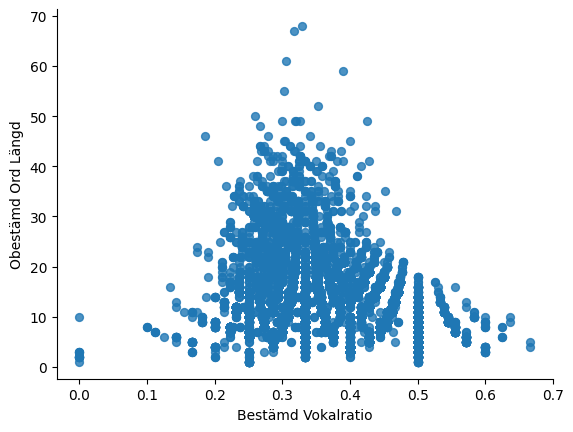

In [ ]:
# Bestämd Vokalratio vs Obestämd Ord Längd

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Bestämd Vokalratio', y='Obestämd Ord Längd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

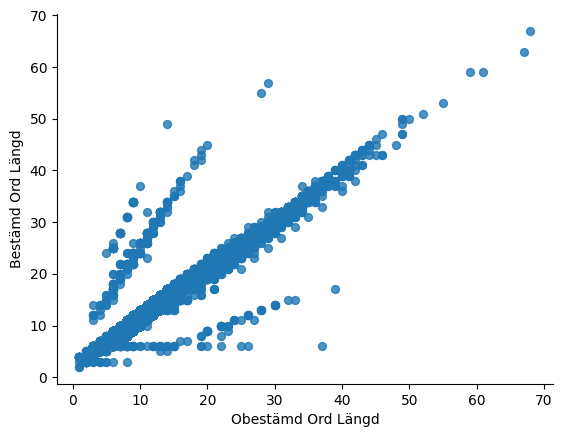

In [ ]:
# Obestämd Ord Längd vs Bestämd Ord Längd

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Obestämd Ord Längd', y='Bestämd Ord Längd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

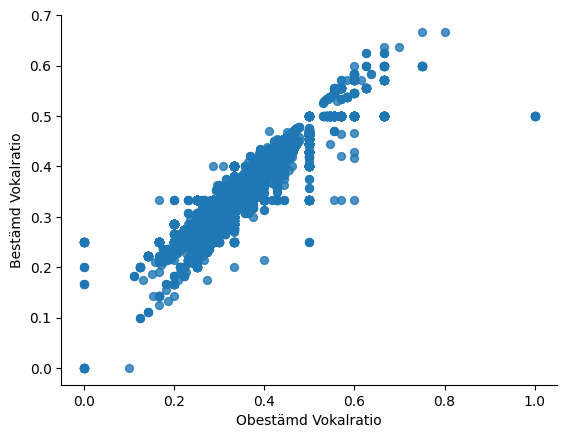

In [ ]:
# Obestämd Vokalratio vs Bestämd Vokalratio

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Obestämd Vokalratio', y='Bestämd Vokalratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

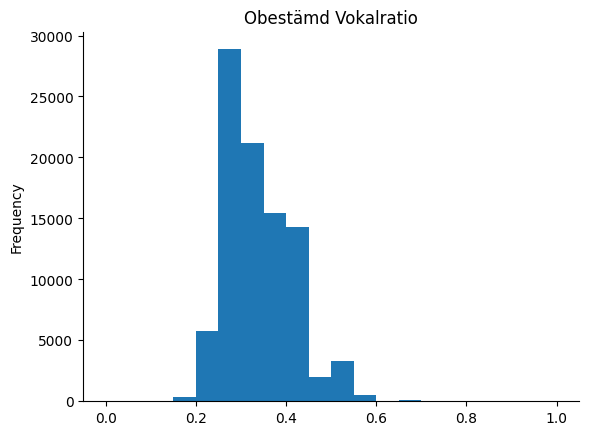

In [ ]:
# Vokalratio i Svenska

from matplotlib import pyplot as plt
df['Obestämd Vokalratio'].plot(kind='hist', bins=20, title='Obestämd Vokalratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

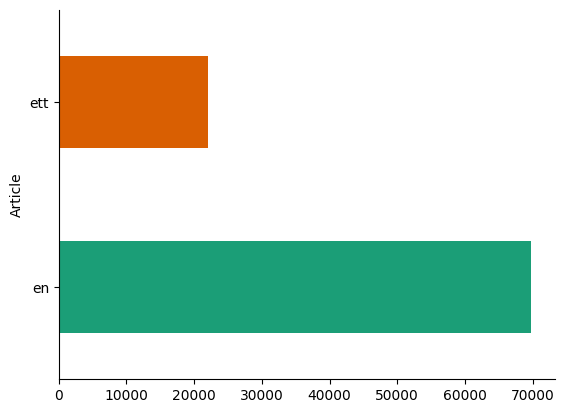

In [ ]:
# Article distribution

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Article').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

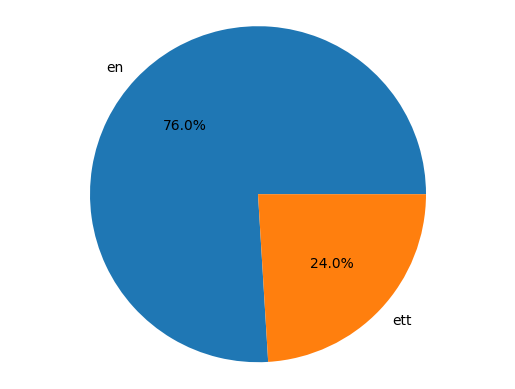

In [ ]:
from matplotlib import pyplot as plt

# Group by 'Article' and get the size
sizes = df.groupby('Article').size()

# Create a pie plot with percentages
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()


In [ ]:
# Preprocessing
obestamd_vokalratio_bins = pd.cut(df['Obestämd Vokalratio'], bins=10)
bestamd_vokalratio_bins = pd.cut(df['Bestämd Vokalratio'], bins=10)
obestamd_ord_length_bins = pd.cut(df['Obestämd Ord Längd'], bins=10)
bestamd_ord_length_bins = pd.cut(df['Bestämd Ord Längd'], bins=10)

# View the groupings
print("Obestämd Vokalratio bins: ", obestamd_vokalratio_bins.unique())
print("Bestämd Vokalratio bins: ", bestamd_vokalratio_bins.unique())
print("Obestämd Ord Längd bins: ", obestamd_ord_length_bins.unique())
print("Bestämd Ord Längd bins: ", bestamd_ord_length_bins.unique())


Obestämd Vokalratio bins:  [(0.2, 0.3], (0.3, 0.4], (0.4, 0.5], (0.1, 0.2], (0.5, 0.6], (0.7, 0.8], (0.6, 0.7], (-0.001, 0.1], (0.9, 1.0]]
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] < ... <
                                            (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]
Bestämd Vokalratio bins:  [(0.267, 0.333], (0.467, 0.533], (0.333, 0.4], (0.2, 0.267], (0.4, 0.467], (0.533, 0.6], (0.133, 0.2], (0.0667, 0.133], (-0.000667, 0.0667], (0.6, 0.667]]
Categories (10, interval[float64, right]): [(-0.000667, 0.0667] < (0.0667, 0.133] < (0.133, 0.2] <
                                            (0.2, 0.267] ... (0.4, 0.467] < (0.467, 0.533] <
                                            (0.533, 0.6] < (0.6, 0.667]]
Obestämd Ord Längd bins:  [(14.4, 21.1], (7.7, 14.4], (0.933, 7.7], (27.8, 34.5], (21.1, 27.8], (34.5, 41.2], (47.9, 54.6], (41.2, 47.9], (54.6, 61.3], (61.3, 68.0]]
Categories (10, interval[float64, right]): [(0.93

In [ ]:
#preprocessing
df['Obestämd Vokalratio'] = pd.cut(df['Obestämd Vokalratio'], bins=10, labels=False)
df['Bestämd Vokalratio'] = pd.cut(df['Bestämd Vokalratio'], bins=10, labels=False)
df['Obestämd Ord Längd'] = pd.cut(df['Obestämd Ord Längd'], bins=10, labels=False)
df['Bestämd Ord Längd'] = pd.cut(df['Bestämd Ord Längd'], bins=10, labels=False)

In [ ]:
df.head()

,Substantiv,Singular obestämd,Singular obestämd genitiv,Singular bestämd,Singular bestämd genitiv,Plural obestämd,Plural obestämd genitiv,Plural bestämd,Plural bestämd genitiv,Article,Obestämd Första Bokstav,Obestämd Initial Två Bokstäver,Obestämd Initial Tre Bokstäver,Obestämd Sista Bokstäver,Obestämd Slutlig Två Bokstäver,Obestämd Slutlig Tre Bokstäver,Obestämd Vokalratio,Bestämd Vokalratio,Obestämd Ord Längd,Bestämd Ord Längd
0,trans·plant·er·ing,transplantering,transplanterings,transplanteringen,transplanteringens,transplanteringar,transplanteringars,transplanteringarna,transplanteringarnas,en,t,tr,tra,g,ng,ing,2,4,2,2
1,streck·are,streckare,streckares,streckaren,streckarens,streckare,streckares,streckarna,streckarnas,en,s,st,str,e,re,are,3,4,1,1
2,eiss,eiss,NOP,eisset,eissets,eiss,eiss,eissen,eissens,ett,e,ei,eis,s,ss,iss,4,7,0,0
3,dis·kvali·fic·er·ing,diskvalificering,diskvalificerings,diskvalificeringen,diskvalificeringens,diskvalificeringar,diskvalificeringars,diskvalificeringarna,diskvalificeringarnas,en,d,di,dis,g,ng,ing,3,5,2,2
4,ut·tag·nings|kom·mitté,uttagningskommitté,uttagningskommittés,uttagningskommittén,uttagningskommitténs,uttagningskommittéer,uttagningskommittéers,uttagningskommittéerna,uttagningskommittéernas,en,u,ut,utt,é,té,tté,2,3,2,2


In [ ]:
# Define the number of iterations
n_iterations = 10

# Define the fraction of data to sample
frac = 0.5

# Initialize a list to store the results of each iteration
results = []

for i in range(n_iterations):
    # Sample the data
    df_sample = df.sample(frac=frac)

    # Preprocess the data
    transactions = df_sample.apply(lambda row: [f'{col}={row[col]}' for col in df_sample.columns if pd.notna(row[col])], axis=1).tolist()

    # Apply the Apriori algorithm
    rules = apriori(transactions, min_support=0.05, min_confidence=0.2, max_length=5,min_min=9)

    # Convert the rules into a list
    results.append((rules))







In [ ]:
# Defining sampling for very large datasets
# Define a function to process a single iteration
def process_iteration(i):
    # Sample the data
    df_sample = df.sample(frac=frac)

    # Preprocess the data
    transactions = df_sample.apply(lambda row: [f'{col}={row[col]}' for col in df_sample.columns if pd.notna(row[col])], axis=1).tolist()

    # Apply the Apriori algorithm
    itemsets,rules = apriori(transactions, min_support=0.05, min_confidence=0.2, max_length=5)

    # Convert the rules into a list and return
    return (rules)

# Use joblib to parallelize the process in 10 iteration
results = Parallel(n_jobs=-1)(delayed(process_iteration)(i) for i in range(10))

In [ ]:
transactions = df.apply(lambda row: [f'{col}={row[col]}' for col in df.columns if pd.notna(row[col])], axis=1).tolist()
itemsets,rules = apriori(transactions, min_support=0.001, min_confidence=0.1, max_length=5)


In [ ]:
#Showing the rules
rules_rhs = filter(lambda rule: (len(rule.lhs) ==1 and len(rule.rhs) == 1 and ('Article=en' in rule.rhs)), rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.confidence):
  print(rule)

{Obestämd Slutlig Två Bokstäver=de} -> {Article=en} (conf: 0.100, supp: 0.002, lift: 0.132, conv: 0.267)
{Obestämd Slutlig Två Bokstäver=te} -> {Article=en} (conf: 0.205, supp: 0.002, lift: 0.270, conv: 0.302)
{Obestämd Slutlig Tre Bokstäver=lag} -> {Article=en} (conf: 0.211, supp: 0.001, lift: 0.277, conv: 0.305)
{Obestämd Slutlig Två Bokstäver=us} -> {Article=en} (conf: 0.241, supp: 0.001, lift: 0.317, conv: 0.317)
{Obestämd Slutlig Tre Bokstäver=and} -> {Article=en} (conf: 0.293, supp: 0.001, lift: 0.386, conv: 0.340)
{Obestämd Slutlig Två Bokstäver=ag} -> {Article=en} (conf: 0.300, supp: 0.004, lift: 0.395, conv: 0.343)
{Obestämd Slutlig Två Bokstäver=ri} -> {Article=en} (conf: 0.301, supp: 0.002, lift: 0.397, conv: 0.344)
{Obestämd Slutlig Två Bokstäver=ne} -> {Article=en} (conf: 0.321, supp: 0.001, lift: 0.422, conv: 0.354)
{Obestämd Slutlig Två Bokstäver=ål} -> {Article=en} (conf: 0.343, supp: 0.001, lift: 0.451, conv: 0.366)
{Obestämd Slutlig Tre Bokstäver=opp} -> {Article=en} 

In [ ]:
#Showing the rules
rules_rhs = filter(lambda rule: (len(rule.lhs) ==1 and len(rule.rhs) == 1 and ('Article=ett' in rule.rhs)), rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.confidence):
  print(rule)

{Obestämd Sista Bokstäver=g} -> {Article=ett} (conf: 0.103, supp: 0.017, lift: 0.430, conv: 0.847)
{Obestämd Slutlig Två Bokstäver=kt} -> {Article=ett} (conf: 0.133, supp: 0.002, lift: 0.551, conv: 0.876)
{Obestämd Slutlig Två Bokstäver=an} -> {Article=ett} (conf: 0.149, supp: 0.002, lift: 0.619, conv: 0.892)
{Obestämd Slutlig Två Bokstäver=ft} -> {Article=ett} (conf: 0.154, supp: 0.001, lift: 0.642, conv: 0.898)
{Obestämd Slutlig Två Bokstäver=ss} -> {Article=ett} (conf: 0.161, supp: 0.001, lift: 0.671, conv: 0.906)
{Obestämd Slutlig Två Bokstäver=ad} -> {Article=ett} (conf: 0.163, supp: 0.002, lift: 0.677, conv: 0.907)
{Obestämd Sista Bokstäver=t} -> {Article=ett} (conf: 0.164, supp: 0.023, lift: 0.680, conv: 0.908)
{Obestämd Slutlig Två Bokstäver=or} -> {Article=ett} (conf: 0.178, supp: 0.001, lift: 0.739, conv: 0.924)
{Obestämd Slutlig Två Bokstäver=rt} -> {Article=ett} (conf: 0.182, supp: 0.001, lift: 0.757, conv: 0.929)
{Bestämd Vokalratio=7} -> {Article=ett} (conf: 0.186, supp: 

In [ ]:
#Showing the rules
rules_rhs = filter(lambda rule: (len(rule.lhs) ==2 and len(rule.rhs) == 1 and ('Article=en' in rule.rhs)), rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.confidence):
  print(rule)

{Obestämd Sista Bokstäver=e, Obestämd Slutlig Två Bokstäver=de} -> {Article=en} (conf: 0.100, supp: 0.002, lift: 0.132, conv: 0.267)
{Obestämd Slutlig Två Bokstäver=de, Obestämd Vokalratio=3} -> {Article=en} (conf: 0.104, supp: 0.001, lift: 0.137, conv: 0.268)
{Bestämd Vokalratio=4, Obestämd Slutlig Två Bokstäver=de} -> {Article=en} (conf: 0.133, supp: 0.001, lift: 0.176, conv: 0.277)
{Bestämd Ord Längd=1, Obestämd Slutlig Två Bokstäver=te} -> {Article=en} (conf: 0.190, supp: 0.001, lift: 0.250, conv: 0.297)
{Obestämd Ord Längd=1, Obestämd Slutlig Två Bokstäver=te} -> {Article=en} (conf: 0.193, supp: 0.001, lift: 0.254, conv: 0.298)
{Obestämd Slutlig Två Bokstäver=te, Obestämd Vokalratio=3} -> {Article=en} (conf: 0.203, supp: 0.001, lift: 0.267, conv: 0.302)
{Obestämd Sista Bokstäver=e, Obestämd Slutlig Två Bokstäver=te} -> {Article=en} (conf: 0.205, supp: 0.002, lift: 0.270, conv: 0.302)
{Obestämd Sista Bokstäver=g, Obestämd Slutlig Tre Bokstäver=lag} -> {Article=en} (conf: 0.211, sup

In [ ]:
#Showing the rules
rules_rhs = filter(lambda rule: (len(rule.lhs) ==2 and len(rule.rhs) == 1 and ('Article=ett' in rule.rhs)), rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.confidence):
  print(rule)

{Obestämd Ord Längd=1, Obestämd Sista Bokstäver=g} -> {Article=ett} (conf: 0.102, supp: 0.011, lift: 0.423, conv: 0.846)
{Obestämd Första Bokstav=k, Obestämd Sista Bokstäver=g} -> {Article=ett} (conf: 0.103, supp: 0.001, lift: 0.428, conv: 0.847)
{Obestämd Första Bokstav=s, Obestämd Sista Bokstäver=g} -> {Article=ett} (conf: 0.104, supp: 0.002, lift: 0.432, conv: 0.848)
{Obestämd Sista Bokstäver=n, Obestämd Vokalratio=4} -> {Article=ett} (conf: 0.106, supp: 0.002, lift: 0.442, conv: 0.850)
{Bestämd Ord Längd=1, Obestämd Sista Bokstäver=g} -> {Article=ett} (conf: 0.110, supp: 0.012, lift: 0.458, conv: 0.854)
{Obestämd Första Bokstav=f, Obestämd Sista Bokstäver=g} -> {Article=ett} (conf: 0.111, supp: 0.001, lift: 0.462, conv: 0.854)
{Obestämd Ord Längd=2, Obestämd Sista Bokstäver=n} -> {Article=ett} (conf: 0.112, supp: 0.001, lift: 0.467, conv: 0.856)
{Obestämd Ord Längd=1, Obestämd Slutlig Två Bokstäver=kt} -> {Article=ett} (conf: 0.117, supp: 0.001, lift: 0.489, conv: 0.861)
{Bestämd O

In [ ]:
#Showing the rules
rules_rhs = filter(lambda rule: (len(rule.lhs) ==3 and len(rule.rhs) == 1 and ('Article=en' in rule.rhs)), rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.confidence):
  print(rule)

Streaming output truncated to the last 5000 lines.
{Bestämd Ord Längd=1, Bestämd Vokalratio=4, Obestämd Sista Bokstäver=g} -> {Article=en} (conf: 0.910, supp: 0.065, lift: 1.198, conv: 2.674)
{Bestämd Ord Längd=1, Obestämd Slutlig Tre Bokstäver=ker, Obestämd Vokalratio=3} -> {Article=en} (conf: 0.910, supp: 0.002, lift: 1.198, conv: 2.678)
{Obestämd Ord Längd=1, Obestämd Slutlig Tre Bokstäver=ker, Obestämd Vokalratio=3} -> {Article=en} (conf: 0.910, supp: 0.002, lift: 1.198, conv: 2.678)
{Bestämd Ord Längd=2, Obestämd Sista Bokstäver=g, Obestämd Vokalratio=3} -> {Article=en} (conf: 0.910, supp: 0.019, lift: 1.198, conv: 2.679)
{Bestämd Vokalratio=5, Obestämd Sista Bokstäver=a, Obestämd Slutlig Två Bokstäver=ga} -> {Article=en} (conf: 0.910, supp: 0.002, lift: 1.199, conv: 2.684)
{Obestämd Första Bokstav=l, Obestämd Initial Två Bokstäver=la, Obestämd Sista Bokstäver=g} -> {Article=en} (conf: 0.910, supp: 0.001, lift: 1.199, conv: 2.684)
{Bestämd Vokalratio=4, Obestämd Första Bokstav=b, 

In [ ]:
#Showing the rules
rules_rhs = filter(lambda rule: (len(rule.lhs) ==3 and len(rule.rhs) == 1 and ('Article=ett' in rule.rhs)), rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.confidence):
  print(rule)

{Bestämd Ord Längd=1, Obestämd Ord Längd=1, Obestämd Sista Bokstäver=g} -> {Article=ett} (conf: 0.106, supp: 0.011, lift: 0.440, conv: 0.850)
{Obestämd Första Bokstav=s, Obestämd Ord Längd=1, Obestämd Sista Bokstäver=g} -> {Article=ett} (conf: 0.109, supp: 0.002, lift: 0.455, conv: 0.853)
{Bestämd Ord Längd=2, Obestämd Vokalratio=2, Plural bestämd genitiv=NOP} -> {Article=ett} (conf: 0.114, supp: 0.001, lift: 0.473, conv: 0.857)
{Bestämd Ord Längd=2, Obestämd Vokalratio=2, Plural bestämd=NOP} -> {Article=ett} (conf: 0.114, supp: 0.001, lift: 0.473, conv: 0.857)
{Bestämd Ord Längd=2, Obestämd Vokalratio=2, Plural obestämd genitiv=NOP} -> {Article=ett} (conf: 0.114, supp: 0.001, lift: 0.474, conv: 0.857)
{Bestämd Ord Längd=2, Obestämd Vokalratio=2, Plural obestämd=NOP} -> {Article=ett} (conf: 0.114, supp: 0.001, lift: 0.474, conv: 0.857)
{Bestämd Ord Längd=1, Bestämd Vokalratio=6, Obestämd Sista Bokstäver=t} -> {Article=ett} (conf: 0.114, supp: 0.001, lift: 0.475, conv: 0.858)
{Obestämd 

In [ ]:
#Showing the rules
rules_rhs = filter(lambda rule: (len(rule.lhs) <=4 and len(rule.rhs) == 1 and (('Article=ett' in rule.rhs) or ('Article=en' in rule.rhs))),rules)
with open('rules.txt', 'w',encoding="utf-8") as outfile:
  for rule in sorted(rules_rhs, key=lambda rule: rule.confidence):
    outfile.write(str(rule)+"\n")
